# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016]

By: Eng. Michael Kofi Armah <br>
In fulfillment of the first project of the ALX-T Data Analysis Nanodegree Certification by Udacity and ALX-T.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<img src = 'https://rendia.com/wp-content/uploads/2020/01/1.17.20-The-Power-of-Storytelling-scaled.jpg' alt = 'appointment show up image' />

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset consists of samples from patients who booked an appointment with a medical center. It is focused on the question of whether or not patients show up for their appointment. The characteristics of the patients are included in each row.

‘ScheduledDay’ provides information on the day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


### Question(s) for Analysis
1. What is the Percentage of Patients who show up for Appointments vs Patients who do not ?
2. On which Day is it likely for Patient's to miss their Appointments
3. Does the month the within which the Appointment was booked have any Significant Impact on whether or not Patients will show up for their Appointments ?
4. Does the Patient's Age determine whether or not he/she will show up for appointments ?
5. How does the Patient's Gender associate with Attending Appointments ?

In [3]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# !pip install --upgrade pandas==0.25.0
# !pip install pandas_profiling

import pandas as pd
from pandas_profiling import profile_report

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Successfully loaded csv data into the working space as a pandas dataframe

In [6]:
df.shape

(110527, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

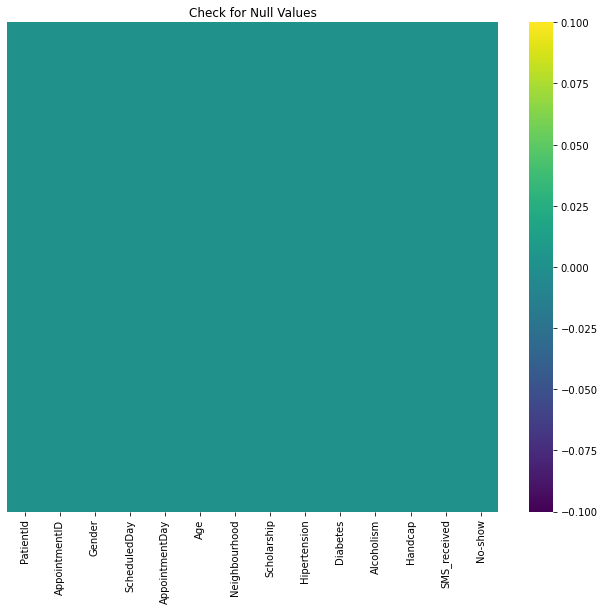

In [9]:
plt.figure(figsize=(11,9))
sns.heatmap(df.isna(),yticklabels=False,cmap = 'viridis');
plt.title("Check for Null Values");

The dataset contains a total of 110527 rows and 14 columns
The summary info and checks for NaN's report a 0 amount of Null values in the dataset.

<a id='wrangling'></a>
## Data Wrangling

<img src = 'https://globalgenes.org/wp-content/uploads/2016/09/giphy-150.gif' width = 1300 alt = 'data cleaning img' />

In [10]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

for convenience (Not necessarily), Values in the Neighbourhood column can be changed from Uppercase to lowercase

In [12]:
df['AppointmentDay'][1:5]

1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [13]:
df["ScheduledDay"][1:5]

1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

AppointmentDay and ScheduledDay columns should be in datetime format for easy date manipulations

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [15]:
df["PatientId"].nunique()

62299

In [16]:
df['AppointmentID'].nunique()

110527

PatientId and AppointmentID columns have 62,299 and 11,0527 unique samples respectively.

PatientId and Appointment have very unique rows.

However, Unlike PatientId, AppointmentID column is contains  0 repeating categories, hence its very unique and sample specific, and as such will not be considered for this analysis

In [17]:
df.duplicated().any()

False

There are no duplicate columns in the dataframe.
This however can be as a result of the AppointmentID column, since it contains truely unique samples

Lets dive deeper by excluding the AppointmentID column 

In [18]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [19]:
df.drop(columns="AppointmentID",axis = 1).duplicated().sum() #check for duplicates without AppointmentID column

618

we had 618 duplicated rows recorded when we did not consider AppointmentID due to its uniqueness

A better solution will be to set it as an Index of the Dataframe

In [20]:
df.set_index("AppointmentID").duplicated().sum() 

618

A total of 618 duplicates detected after droping the AppointmentID column.

This gives us a bigger insight that the AppointmentID characterizes each sample in the dataset
as truely unique in terms of appointment submissions only.

This also raises the possibility that,the system permits Users to be able to submit applications more than once and a unique AppointmentId is given each time a submission is made, 


Lastly, since ScheduledDay and AppointmentID columns are taken into consideration during the computation of duplicated samples, Its best to consider droping or removing the 618 duplicates with little to no aknowledgement to the fact that the patients might have booked on different occasions with the same details.

### Implementation of Data Cleaning Steps

In [21]:
df["Neighbourhood"] = [x.lower() for x in df['Neighbourhood']]

 changing values in Neighbourhood column to lowercase

In [22]:
df["AppointmentDay"],df["ScheduledDay"] = [pd.to_datetime(df[x]) for x in ("AppointmentDay","ScheduledDay")]

convert AppointmentDay and ScheduledDay to pandas datetime format

In [23]:
df.set_index("AppointmentID",verify_integrity= True,inplace= True)  #set AppointmentID as index or primary key

AppointmentID column is set as an index to :
1. Prevent it from covering up for duplicate values
2. Serves as a truely informative primary key or index instead of the default numerals provided by pandas

In [24]:
df = df.drop_duplicates() #drop duplicates

In [25]:
df = df.rename(columns = {"No-show":"NoShow"})

rename No-show to NoShow to agree with pandas methods such as pandas.dataframe.query()

In [26]:
profile_report.ProfileReport(df) #Quick Inspecting of the current state of the data after cleaning

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a id='eda'></a>
## Exploratory Data Analysis

<img src = 'https://media3.giphy.com/media/l0HlTjXqDOk0ZZkfC/giphy.gif' alt = 'data exploration gif' width = 1300 />

In [27]:
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,jardim da penha,0,1,0,0,0,0,No
5642503,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,jardim da penha,0,0,0,0,0,0,No
5642549,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,mata da praia,0,0,0,0,0,0,No
5642828,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,pontal de camburi,0,0,0,0,0,0,No
5642494,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,jardim da penha,0,1,1,0,0,0,No


In [28]:
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.099090e+05,109909.000000,109909.000000,109909.000000,109909.000000,109909.000000,109909.000000,109909.000000
mean,1.474577e+14,37.086472,0.098281,0.197236,0.071814,0.030425,0.022127,0.322831
std,2.560490e+14,23.121491,0.297696,0.397914,0.258181,0.171755,0.160866,0.467561
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172982e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [29]:
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

seaborn darkgrid style and matplotlib's "fivethirtyeight" style will be used to style the incoming plots

## Research Question 1
### What is the Percentage of Patients who show up for Appointments vs Patients who do not ?

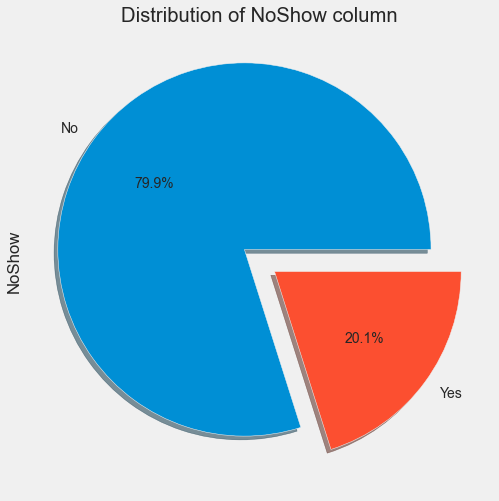

In [30]:
plt.figure(figsize = [12,8])
df['NoShow'].value_counts().plot(kind = 'pie',autopct = "%1.1f%%",
                                   explode = [0.1,0.1],shadow = True);

plt.title("Distribution of NoShow column");

The NoShow column is highly imbalanced with 79.9% of the data belonging to Patient's who showed up for appointments 
and only 20.1% for Patient's who did not show up for Appointments

In [31]:
def pie_matrix(column,explode,ax):
    """plot a pie chart of a categorical feature"""   
    df[column].value_counts().plot(kind = 'pie',autopct = "%1.1f%%",
                                   explode = explode*df[column].nunique(),ax = ax,shadow = True)
    

The pie_matrix function will be plots a pie chart of a given categorical varible

<Figure size 864x576 with 0 Axes>

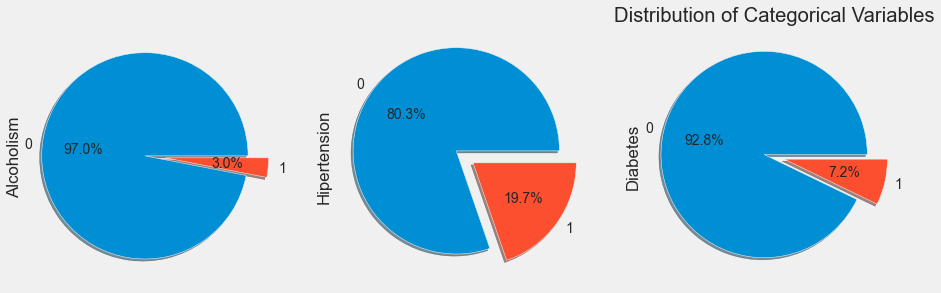

In [32]:
plt.figure(figsize = [12,8]);
fig,axes = plt.subplots(nrows=1,ncols=3,figsize = (14,14));
pie_matrix(column = 'Alcoholism',explode = [0.1],ax = axes[0]);
pie_matrix(column = 'Hipertension',explode = [0.1],ax = axes[1]);
pie_matrix(column = 'Diabetes',explode = [0.1],ax = axes[2]);
plt.title("Distribution of Categorical Variables");

<ul>
    <li>we have 97% of the Patients in our sample data addicted to Alcohol</li>
    <li>80.3% have Hypertension</li>
    <li>92.8% are Diabetic </li>  
</ul>

<Figure size 864x576 with 0 Axes>

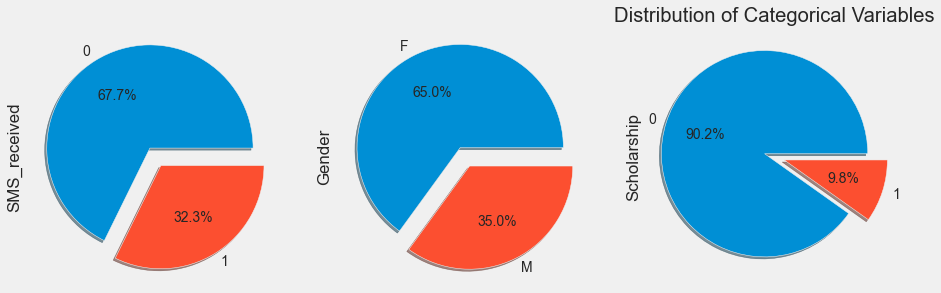

In [33]:
plt.figure(figsize = [12,8]);
fig,axes = plt.subplots(nrows=1,ncols=3,figsize = (14,14));
plt.style.use("fivethirtyeight");
pie_matrix(column = 'SMS_received',explode = [0.1],ax = axes[0]);
pie_matrix(column = 'Gender',explode = [0.1],ax = axes[1]);
pie_matrix(column = 'Scholarship',explode = [0.1],ax = axes[2]);
plt.title("Distribution of Categorical Variables");

<b> From The Sample Population being analyzed </b>
<ul>
    <li>67.7% of the Patients recieved SMS Alerts</li>
    <li>65.0% are Females, and</li>
    <li>90.2% of the patients are enrolled in Brasilian welfare program Bolsa Família.</li>

## Research Question 2 
### On which Day is it likely for Patient's to miss their Appointments

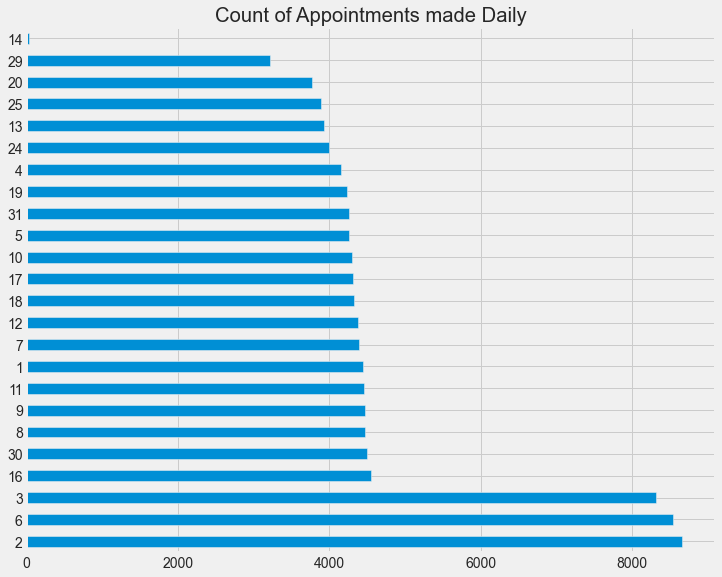

In [34]:
plt.figure(figsize = (11,9))
df.AppointmentDay.dt.day.value_counts().plot(kind = 'barh');
plt.title("Count of Appointments made Daily");

We have more appointment's coming through on the 2nd,3rd,6th day of every month

In [35]:
df['day'] = df.AppointmentDay.dt.day

In [42]:
absent = df['NoShow'] == "Yes"
present = df["NoShow"] == "No" 

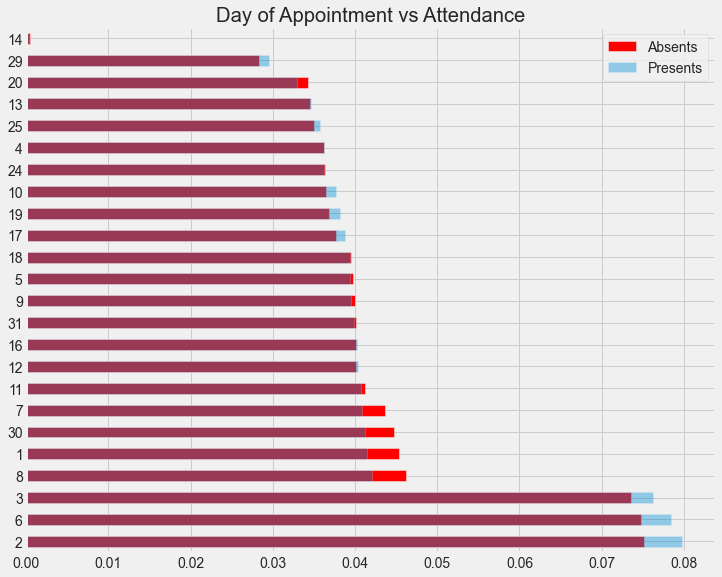

In [43]:
plt.figure(figsize= (11,9))
df.day[absent].value_counts(normalize = True).plot(kind = 'barh',color = 'red',label = "Absents")
df.day[present].value_counts(normalize = True).plot(kind = 'barh',alpha = 0.4,label = "Presents")
plt.title("Day of Appointment vs Attendance")
plt.legend()
plt.show()

A greater number of Patient's who booked their Appointment on the 1st,7th,8th and 30th day of the months failed to show-up for their Appointments

## Research Question 3
### Does the month the within which the Appointment was booked have any Significant Impact on whether or not  Patients will show up for their Appointments ?

In [ ]:
plt.figure(figsize = [10,7])
month = df["AppointmentDay"].dt.month
df["month"] = month
df.groupby("month")["NoShow"].value_counts(normalize = True).plot(kind = "bar",color = ["green","red"]);
plt.title("Month of Appointment vs Attendance");

There is little to no association between the month of the appointment and appointment absenteesm

## Research Question 4
### Does the Patient's Age determine whether or not he/she will show up for appointments ?

<img src="https://healthcreeds.com/wp-content/uploads/2021/05/medical-advice-senior-scaled.jpg" alt="old-age" width = 1300px>

In [ ]:
plt.figure(figsize = [10,7])
sns.histplot(data = df,kde=True,x = 'Age',hue = 'NoShow',bins = 20);
plt.title("Age Distribution by Appointment Show-up");

In [ ]:
print("Skew (Patient's Age) = ",df['Age'].skew())

The distribution of the Age column is positively skewed (the tail is larger towards the right hand side of the distribution) with a skew of 0.12,

Due to its asymetric nature, we will opt for the median as a measure of central tendency.

In [ ]:
plt.figure(figsize=[11,8])
df.groupby("NoShow")["Age"].median().plot(kind = "bar",color = ['blue','pink']);
plt.title("Average Age Grouped by Appointment Show-up");

There is a Significant Difference Between the Ages of Patients who show up for their appointments and those who do not ?

In context, Older Patient's are likely to show up for Appointments compared to younger patients

In [ ]:
plt.style.use('ggplot')

Set the matplotlib's style from fiftythirtyeight to ggplot

## Research Question 5
### How does the Patient's Gender associate with Attending  Appointments ?

In [ ]:
plt.figure(figsize = [10,7])
df.query('Gender == "F"')['NoShow'].value_counts(normalize = True).plot(kind = 'bar',color = 'brown',label = 'Female')
df.query('Gender == "M"')['NoShow'].value_counts(normalize = True).plot(kind = 'bar',color ='blue',alpha = 0.5,label = "Male")
plt.xlabel("NoShow")
plt.ylabel("Percentage Count by Gender")
plt.legend();

From the above exploration, it shows that Patient's Gender does not necessarily have any strong association with
whether he/she will show up for Appointments or not

In [ ]:
df.head(3)

## Research Question 5 
### Is there any association between Recieving SMS Alerts and whether or not patients show up for their appointment

In [ ]:
plt.figure(figsize = [10,7])
df.query('SMS_received == 0')['NoShow'].value_counts(normalize = True).plot(kind = 'bar',color = 'brown',label = 'None Recieved')
df.query('SMS_received == 1')['NoShow'].value_counts(normalize = True).plot(kind = 'bar',color ='blue',alpha = 0.5,label = "Recieved")
plt.legend();
plt.xlabel("NoShow");
plt.ylabel('Percentage Count by SMS');

SMS Alerts does not guarantee Patients Attendance to Appointments.<br/>
Suprisingly, there is an association between Patients <b>who do not recieve SMS</b> and appointment attendance.

<a id='conclusions'></a>
## Conclusions
<img src = 'https://s3.amazonaws.com/stockfreedom/wp-content/uploads/2018/02/23164958/sf3274689sm.jpg' alt="conclusion.png" width = 1300px>

Attention should be given to the SMS Alerts sent to Patients after Appointments are booked. It suprising to say that patients who receive SMS alerts are most likely to not show up for their appointment.

This factor should be throughly explored to discover why this happens.

Greater Emphasis should be placed on the 1st,7th,8th and 30th day of the months since patient's most likely fail to show-up for their Appointments on these dates. Proper Analysis should be made to determine factors affecting such dates, e.g Events and Occasions etc, holidays etc.

A limitation to this analysis is with regards to the sample distribution of the Dependent Variable (NoShow Column).
The NoShow column is highly imbalanced and as such may affect predictive modeling. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

# For Artificial Intelligence | Machine learning | Predictive Modeling
<hr>
<img src ='https://media1.tenor.com/images/01e818d81e0fd41e26a485a893934afd/tenor.gif?itemid=15762769' alt = 'text-me' width = 1300px>